In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import scipy
from scipy.optimize import curve_fit
import seaborn as sns
from matplotlib import cm
import matplotlib as mpl
import csv
import scipy.io as sio
import pandas as pd
from scipy.special import erf
import time
import torch
import os
from matplotlib.lines import Line2D

# plotting configuration
ratio = 1.7
figure_len, figure_width = 24*ratio, 18*ratio
title_font_size = 12*ratio
font_size_1, font_size_2 = 9*ratio, 9*ratio
legend_size = 18*ratio
line_width, tick_len = ratio, 4*ratio
marker_size = 5*ratio
plot_line_width = 2*ratio
hfont = {'fontname': 'Arial'}
marker_edge_width = 4
pal = sns.color_palette("deep")
sns.set(style='ticks')

### Fig. 4B - patterned perturbations

Text(0.5, 1.1, 'Patterned perturbation')

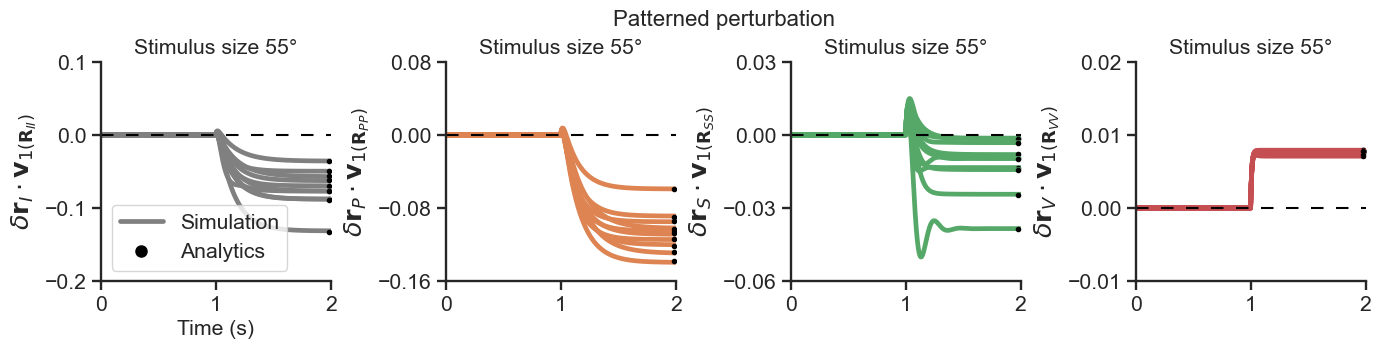

In [2]:
l_selected_indices = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]

l_stimulus = [0, 5, 15, 25, 35, 45, 55, 65, 75, 85]
n_stimulus = len(l_stimulus)
l_celltype = ['PV', 'SST', 'VIP']
l_baseline = sio.loadmat("data/baselines.mat")['baseline']

config = 'final_gaussian_classical'
# l_selected_indices = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
l_alpha = [0.25, 0.5, 0.75, 1]

l_s_manipulation = ['patterned_inh_perturbation', 'patterned_PV_perturbation', 'patterned_SST_perturbation', 'patterned_VIP_perturbation']
l_celltype_label = ['Inh', 'P', 'S', 'V']

projection_coeff_patterned = sio.loadmat('data/projection_coeff_patterned.mat')['projection_coeff']

folder_path = 'models/optimized_files_' + config
model_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f != '.DS_Store']
sorted_files = sorted(model_names, key=lambda name: float(name.replace('.pt', '')))
sorted_numbers = sorted([float(f.replace('.pt', '')) for f in sorted_files])
selected_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

fig, axes = plt.subplots(1, 4, figsize=(15*0.9, 3.2*0.9))
fig.tight_layout()
    
for m in range(len(l_s_manipulation)):
    s_manipulation = l_s_manipulation[m]
    s_manipulation_legend = s_manipulation.replace('_', ' ')
    
    if m == 0:
        fr_data_P = sio.loadmat('simulation_data/fr_P_' + s_manipulation + '_' + config + '.mat')['P']
        fr_data_S = sio.loadmat('simulation_data/fr_S_' + s_manipulation + '_' + config + '.mat')['S']
        fr_data_V = sio.loadmat('simulation_data/fr_V_' + s_manipulation + '_' + config + '.mat')['V']
        fr_data = fr_data_P + fr_data_S + fr_data_V
    else:
        fr_data = sio.loadmat('simulation_data/fr_' + l_celltype_label[m] + '_' + s_manipulation + '_' + config + '.mat')[l_celltype_label[m]]
    
    axes[m].spines['top'].set_visible(False)
    axes[m].spines['right'].set_visible(False)
    axes[m].spines['bottom'].set_visible(True)
    axes[m].spines['left'].set_visible(True)
    for axis in ['top', 'bottom', 'left', 'right']:
        axes[m].spines[axis].set_linewidth(line_width)
    axes[m].tick_params(width=line_width, length=tick_len)

    for n in range(len(l_selected_indices[0])):
        if m == 0:
            axes[m].plot(fr_data[n, 6, :], linewidth=plot_line_width, color='gray')
            axes[m].plot(1980, 0.005*projection_coeff_patterned[m, n, 6], marker='o', color='black', markersize=3)
        else:
            axes[m].plot(fr_data[n, 6, :], linewidth=plot_line_width, color=pal[m])
            axes[m].plot(1980, 0.005*projection_coeff_patterned[m, n, 6], marker='o', color='black', markersize=3)

    axes[m].axhline(y=0, color='black', linestyle=(0, (6, 6, 6, 6)))

    axes[m].set_xlim(0, 2000)
    axes[m].set_xticks([0, 1000, 2000], [0, 1, 2])
    axes[m].set_title(f'Stimulus size {l_stimulus[6]}°', fontdict = {'fontname': 'Arial', 'fontsize': font_size_1})

    axes[m].tick_params(axis='both', which='major', labelsize=font_size_1)  # Customize tick label font size

    if m == 0:
        axes[m].set_ylim(-0.2, 0.1)
        axes[m].set_yticks([-0.20, -0.10, 0, 0.10])
    elif m == 1:
        axes[m].set_ylim(-0.16, 0.08)
        axes[m].set_yticks([-0.16, -0.08, 0, 0.08])
    elif m == 2:
        axes[m].set_ylim(-0.06, 0.03)
        axes[m].set_yticks([-0.06, -0.03, 0, 0.03])
    else:
        axes[m].set_ylim(-0.01, 0.02)
        axes[m].set_yticks([-0.01, 0, 0.01, 0.02])

    if m == 0:
        color_idx = 'gray'
    else:
        color_idx = pal[m+1]
        
    legend_handles = [
    Line2D([0], [0],
           color=color_idx,
           linewidth=plot_line_width,
           label='Simulation'),
    Line2D([0], [0],
           marker='o',
           color='black',
           linestyle='None',
           markersize=8,   # make the dot big
           label='Analytics')
    ]

    if m == 0:
        axes[m].set_xlabel('Time (s)', fontdict={'fontname': 'Arial', 'fontsize': font_size_1})
        axes[m].set_ylabel(r'$\delta \mathbf{r}_I \cdot \mathbf{v}_{1 (\mathbf{R}_{II})}$', fontdict={'fontname': 'Arial', 'fontsize': font_size_1+3})
        axes[m].legend(
        handles=legend_handles,
        loc='best',
        prop={"family": "Arial", "size": font_size_1}
        )
    elif m == 1:
        axes[m].set_ylabel(r'$\delta \mathbf{r}_P \cdot \mathbf{v}_{1 (\mathbf{R}_{PP})}$', fontdict={'fontname': 'Arial', 'fontsize': font_size_1+3})
    elif m == 2:
        axes[m].set_ylabel(r'$\delta \mathbf{r}_S \cdot \mathbf{v}_{1 (\mathbf{R}_{SS})}$', fontdict={'fontname': 'Arial', 'fontsize': font_size_1+3})
    else:
        axes[m].set_ylabel(r'$\delta \mathbf{r}_V \cdot \mathbf{v}_{1 (\mathbf{R}_{VV})}$', fontdict={'fontname': 'Arial', 'fontsize': font_size_1+3})
        
    for label in (axes[m].get_xticklabels() + axes[m].get_yticklabels()):
        label.set_fontname('Arial')

fig.subplots_adjust(hspace=0.4, wspace=0.5)
title_font_size = 16
fig.suptitle('Patterned perturbation', y=1.1, fontsize=title_font_size, fontname='Arial')
# fig.savefig('paper_figures/paper_png/Fig_patterned_perturbation.png', bbox_inches='tight', dpi=300)